In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow.keras.layers as layers
import tensorflow.keras.optimizers as optimizers

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train, test = tf.keras.datasets.fashion_mnist.load_data()

images_train, labels_train = train
images_test, labels_test = test

images = np.concatenate((images_train, images_test))
labels = np.concatenate((labels_train, labels_test))

images = images/255.0

labels = labels.astype(np.int32)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, random_state=10, stratify=labels)

train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))

train_ds = train_ds.shuffle(1000).batch(batch_size=128).repeat()

In [7]:
f_mnist_model = tf.keras.Sequential([
    layers.Conv2D(64, (5, 5), 
                  padding="same", 
                  activation="relu",
                  input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, (5, 5), 
                  padding="same", 
                  activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(256, (5, 5), 
                  padding="same", 
                  activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation="relu"),
    layers.Dense(10, activation='softmax')
])

C:\Users\tomas\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
f_mnist_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 64)          │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 256)           │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,618,698 (6.17 MB)

 Trainable params: 1,618,698 (6.17 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
def const_scheduler(epoch):
    if epoch < 33:
          return 0.01
    elif epoch < 66:
          return 0.001
    else:
          return 0.0001

In [13]:
f_mnist_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

In [132]:
train_stats = f_mnist_model.fit(train_ds, epochs=100, verbose=1, steps_per_epoch=200, 
                                callbacks=[tf.keras.callbacks.LearningRateScheduler(const_scheduler)])

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 240s 1s/step - accuracy: 0.5200 - loss: 2.0697 - learning_rate: 0.0100
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 187s 933ms/step - accuracy: 0.8361 - loss: 0.4386 - learning_rate: 0.0100
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 216s 1s/step - accuracy: 0.8545 - loss: 0.3835 - learning_rate: 0.0100
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 224s 1s/step - accuracy: 0.8733 - loss: 0.3440 - learning_rate: 0.0100
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 222s 1s/step - accuracy: 0.8747 - loss: 0.3319 - learning_rate: 0.0100
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 254s 1s/step - accuracy: 0.8736 - loss: 0.3356 - learning_rate: 0.0100
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 264s 1s/step - accuracy: 0.8827 - loss: 0.3153 - learning_rate: 0.0100
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 242s 1s/step - accuracy: 0.8815 - loss: 0.3124 - learning_rate: 0.0100
Epoch 9/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 236s 1s/step - accuracy: 0.8852 - loss: 0.3058 - learning_ra

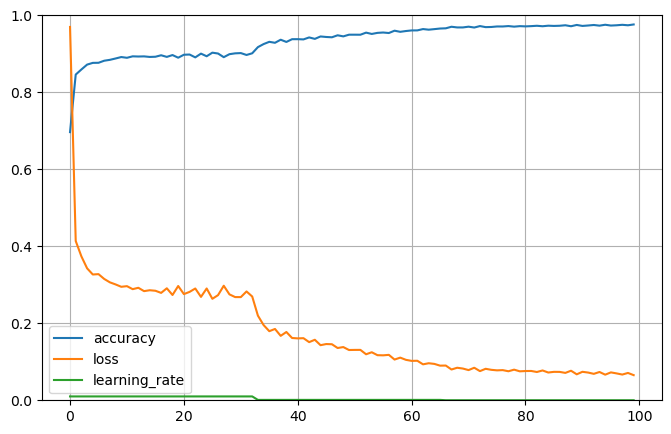

In [134]:
pd.DataFrame(train_stats.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [136]:
test_stats = f_mnist_model.evaluate(X_test, y_test)

219/219 ━━━━━━━━━━━━━━━━━━━━ 21s 96ms/step - accuracy: 0.9065 - loss: 0.4379


### Więcej niż 0,90 nie byłem w stanie osiągnąć.

In [139]:
y_pred = f_mnist_model.predict(X_test)

219/219 ━━━━━━━━━━━━━━━━━━━━ 21s 93ms/step


In [141]:
f_mnist_model.save('saved_model/model_1.keras')

In [143]:
labels_names = {0:'t_shirt', 1:'trouser', 2:'pullover', 3:'dress', 4:'coat', 5:'sandal', 6:'shirt', 7:'sneaker', 8:'bag', 9:'ankle_boots'}

In [145]:
def pred_and_show(i):
    print("probs : ", y_pred[i])
    print("class :", labels_names[np.argmax(y_pred[i])])
    print("real class: ", labels_names[y_test[i]])
    
    plt.imshow(X_test[i], cmap=plt.get_cmap('gray'))
    plt.show()

probs :  [9.5449122e-06 2.0890156e-09 7.0195884e-01 1.0183435e-02 2.8429690e-01
 1.0181439e-05 3.3454932e-03 1.2817849e-05 1.8273073e-04 2.9552112e-08]
class : pullover
real class:  coat


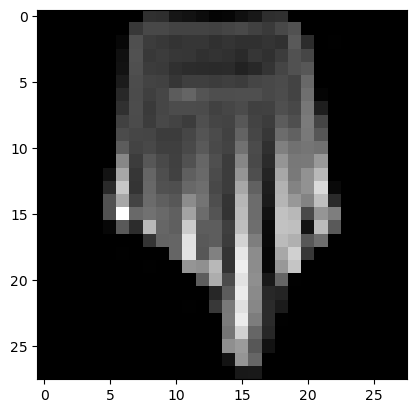

probs :  [4.71840462e-21 9.24510438e-33 1.21403741e-24 1.27383056e-26
 2.42652432e-33 1.00000000e+00 3.40274548e-36 3.24061687e-13
 2.28815553e-15 4.83804361e-16]
class : sandal
real class:  sandal


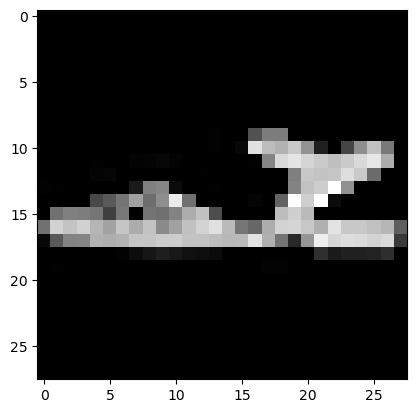

probs :  [3.7940474e-24 7.8588391e-34 0.0000000e+00 0.0000000e+00 1.2928783e-34
 0.0000000e+00 2.7787387e-27 0.0000000e+00 1.0000000e+00 8.2922061e-31]
class : bag
real class:  bag


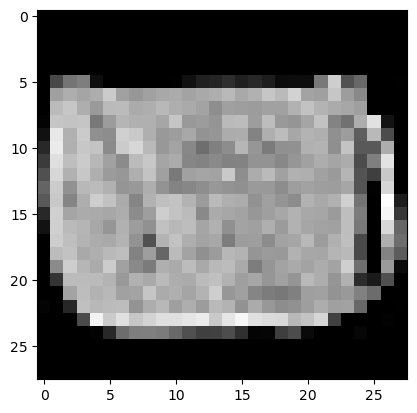

probs :  [0.0000000e+00 1.0000000e+00 0.0000000e+00 1.7587106e-34 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
class : trouser
real class:  trouser


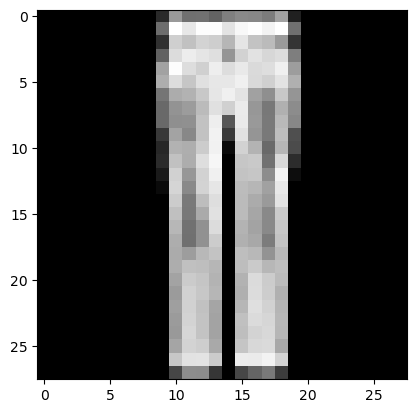

probs :  [9.7753355e-07 2.2828577e-12 9.8502874e-01 7.3930628e-10 6.2153063e-06
 8.3229999e-15 1.4964077e-02 2.1571340e-18 3.8401426e-10 7.0159443e-15]
class : pullover
real class:  pullover


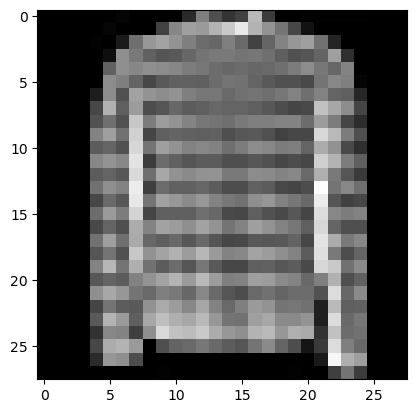

probs :  [6.4670155e-03 2.7115544e-07 1.0264232e-01 1.2852115e-05 7.8845376e-01
 1.3859592e-07 1.0242124e-01 3.8055896e-14 2.3804198e-06 7.8788203e-09]
class : coat
real class:  shirt


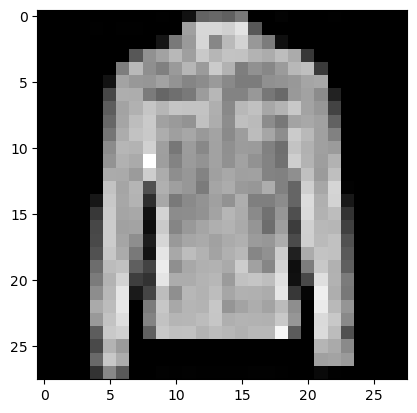

probs :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
class : sandal
real class:  sandal


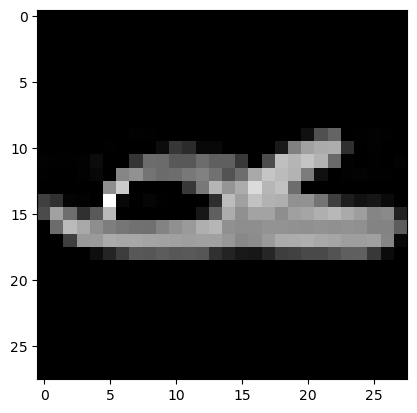

probs :  [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 1.4764314e-36]
class : sneaker
real class:  sneaker


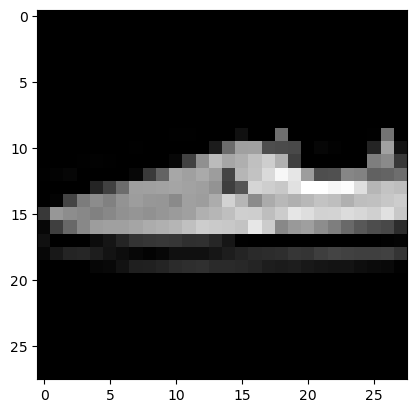

probs :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
class : sandal
real class:  sandal


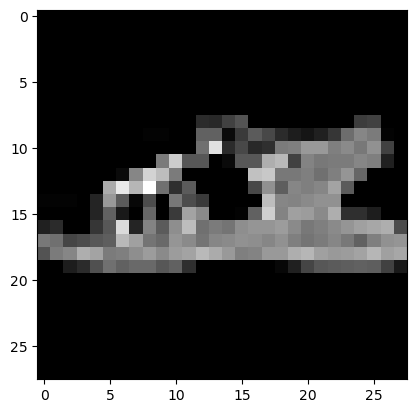

probs :  [3.18333360e-10 6.83738293e-15 1.31327197e-01 4.31615750e-11
 8.68568420e-01 4.47324053e-11 1.04394974e-04 1.69581786e-17
 5.38763409e-11 2.11607706e-17]
class : coat
real class:  coat


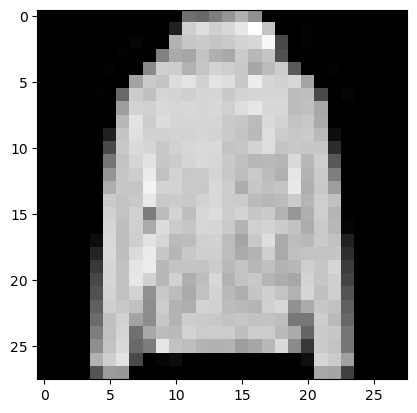

In [147]:
for i in range(10):
    pred_and_show(i)

In [55]:
datagen = ImageDataGenerator(
    featurewise_center=False,  
    samplewise_center=False,  
    featurewise_std_normalization=False,  
    samplewise_std_normalization=False, 
    rotation_range=25,  
    width_shift_range=0.1, 
    height_shift_range=0.1,  
    horizontal_flip=False, 
    vertical_flip=False) 

In [57]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [59]:
datagen.fit(X_train)

In [61]:
train_flow = datagen.flow(X_train, y_train, batch_size=64)

In [63]:
train_stats_flow = f_mnist_model.fit(train_flow, epochs=100, verbose=1, steps_per_epoch=200, 
                                callbacks=[tf.keras.callbacks.LearningRateScheduler(const_scheduler)])

Epoch 1/100


C:\Users\tomas\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


200/200 ━━━━━━━━━━━━━━━━━━━━ 86s 429ms/step - accuracy: 0.7540 - loss: 0.6422 - learning_rate: 0.0100
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 94s 472ms/step - accuracy: 0.7427 - loss: 0.6539 - learning_rate: 0.0100
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 97s 484ms/step - accuracy: 0.7604 - loss: 0.6274 - learning_rate: 0.0100
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 99s 493ms/step - accuracy: 0.7563 - loss: 0.6225 - learning_rate: 0.0100
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 92s 460ms/step - accuracy: 0.7675 - loss: 0.6077 - learning_rate: 0.0100
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 100s 501ms/step - accuracy: 0.7715 - loss: 0.5997 - learning_rate: 0.0100
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 104s 522ms/step - accuracy: 0.7644 - loss: 0.5936 - learning_rate: 0.0100
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 102s 512ms/step - accuracy: 0.7725 - loss: 0.5951 - learning_rate: 0.0100
Epoch 9/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 100s 502ms/step - accuracy: 0.7921 - loss: 0.5483 - lear

Chciałem zgodnie z ostrzeżeniem ustawić parametry 'workers', 'use_multiprocessing', 'max_queue_size', ale żeby to zrobić musiałbym użyć metody fit_generator. Ta metoda jednak generowała błąd mówiący, że obiekt 'sequential' takiej metody nie posiada. Nie wiem z czego to wynika, bo gdziekolwiek nie szukam to jest używana ta metoda na takim właśnie obiekcie. 

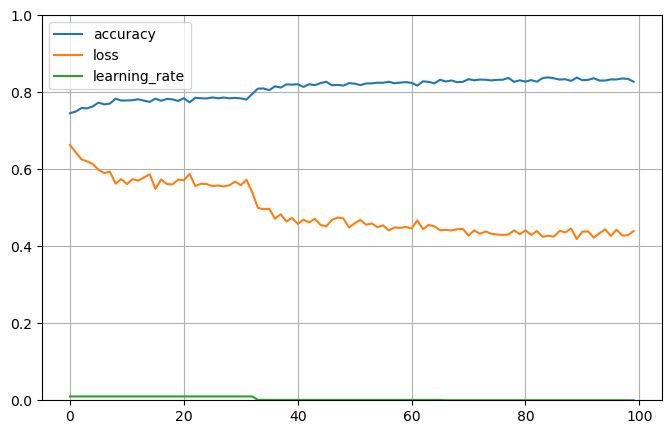

In [65]:
pd.DataFrame(train_stats_flow.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [67]:
test_stats_flow = f_mnist_model.evaluate(X_test, y_test)

219/219 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.8387 - loss: 0.4260
